In [1]:
import matplotlib.pyplot as plt
import numpy as np
import csv
import pandas as pd
import seaborn as sns
import math
from scipy import stats
from mpl_toolkits.basemap import Basemap
from matplotlib import cm
import matplotlib.colors as colors
from datetime import datetime




In [2]:
data_monthly=pd.read_csv("http://hs.pangaea.de/Projects/TOAR/yearly_statistics/TOAR_sfc_ozone_monthly_global_2000-2004_v1_1.csv",skiprows=65,sep=';')

data_monthly=data_monthly[data_monthly['mean']>0]
print(len(data_monthly))
print(data_monthly.columns)

190997
Index(['numid', 'network_name', 'station_id', 'station_name',
       'station_country', 'station_type', 'station_type_of_area',
       'station_lat', 'station_lon', 'station_alt', 'station_google_alt',
       'station_etopo_relative_alt', 'station_population_density',
       'station_max_population_density_5km',
       'station_max_population_density_25km', 'station_nightlight_1km',
       'station_nightlight_5km', 'station_max_nightlight_25km',
       'station_htap_region', 'station_climatic_zone',
       'station_dominant_landcover', 'station_landcover_description',
       'station_nox_emissions', 'station_omi_no2_column',
       'station_toar_category', 'datetime', 'data_capture', 'mean',
       'avgdma8epax', 'w90', 'w126', 'median', 'p05', 'p10', 'p25', 'p75',
       'p90', 'p95', 'daytime_avg', 'nighttime_avg', 'daylight_avg', 'nvgt050',
       'nvgt060', 'nvgt070', 'nvgt080', 'nvgt090', 'nvgt100', 'nvgt120'],
      dtype='object')


In [3]:
data_monthly.datetime=[datetime.strptime(x, '%Y-%m-%d %H:%M') for x in data_monthly.datetime]
data_monthly2=data_monthly.set_index('datetime')
data_monthly2['month']=data_monthly2.index.month

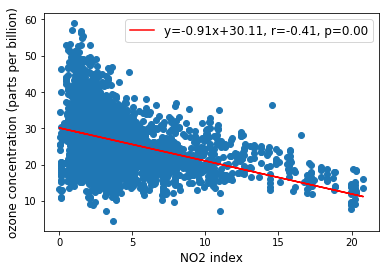

In [4]:
x=data_monthly2.groupby('station_id')['station_omi_no2_column'].mean().values
y=data_monthly2.groupby('station_id')['mean'].mean().values

plt.scatter(x,y)

slope, intercept, r_value, p_value, std_err = stats.linregress(x,y)

line = slope*x+intercept

plt.plot(x, line, 'r', label='y={:.2f}x+{:.2f}, r={:.2f}, p={:.2f}'.format(slope,intercept,r_value,p_value))

plt.legend(fontsize=12)
plt.xlabel('NO2 index',fontsize=12)
plt.ylabel('ozone concentration (parts per billion)',fontsize=12)

plt.show()



In [5]:
print(stats.pearsonr(x,y))

(-0.4083726078175551, 1.8055830182596492e-150)


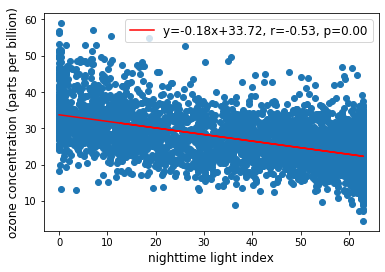

In [6]:
x=data_monthly2.groupby('station_id')['station_nightlight_5km'].mean().values
y=data_monthly2.groupby('station_id')['mean'].mean().values

plt.scatter(x,y)



slope, intercept, r_value, p_value, std_err = stats.linregress(x,y)

line = slope*x+intercept

plt.plot(x, line, 'r', label='y={:.2f}x+{:.2f}, r={:.2f}, p={:.2f}'.format(slope,intercept,r_value,p_value))

plt.legend(fontsize=12)

plt.xlabel('nighttime light index',fontsize=12)
plt.ylabel('ozone concentration (parts per billion)',fontsize=12)

plt.show()



In [7]:
print(stats.pearsonr(x,y))

(-0.5299754940762036, 2.9711014101884042e-270)
